In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", lin_reg)
    ])

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x. reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
from sklearn.metrics import mean_squared_error
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6880004678712686

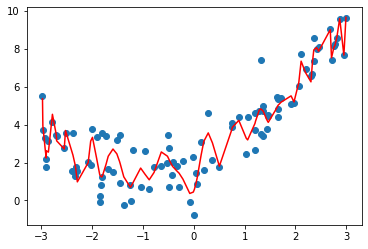

In [6]:
y100_predict = poly100_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

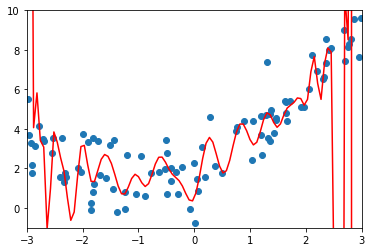

In [7]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)
plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, -1, 10])
plt.show()

In [8]:
lin_reg.coef_

array([ 1.21097006e+12,  1.19198819e+01,  1.78867904e+02, -2.95987019e+02,
       -1.79531579e+04, -1.54151064e+04,  8.34384008e+05,  8.19758499e+05,
       -2.23628081e+07, -1.44767967e+07,  3.87211849e+08,  1.13415788e+08,
       -4.61600837e+09, -1.25028833e+08,  3.93150842e+10, -5.47613295e+09,
       -2.44176507e+11,  5.46306491e+10,  1.11421150e+12, -2.76412491e+11,
       -3.71329570e+12,  8.55468251e+11,  8.80961399e+12, -1.60750401e+12,
       -1.39204217e+13,  1.49444135e+12,  1.19236839e+13,  2.47521688e+11,
        4.42430553e+11, -1.64287100e+12, -1.05153908e+13, -1.80895216e+11,
        3.00207361e+12,  2.75578358e+12,  8.74123180e+12, -1.36695737e+12,
       -1.22670880e+12, -7.00478229e+11, -8.24896132e+12, -8.66309669e+11,
       -2.75689072e+12,  1.39629460e+12,  6.26144462e+12, -3.47974176e+11,
        6.29124500e+12,  1.33767267e+12, -6.11898796e+11,  2.92306225e+11,
       -6.59758602e+12, -1.85664319e+12, -4.13408892e+12, -9.72006661e+11,
       -3.99038794e+11, -

为了尽量地拟合数据，使得线条非常陡峭，数学上表示就是系数非常大

### 岭回归

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

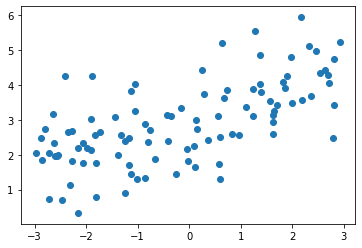

In [13]:
plt.scatter(X, y)
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [15]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)
y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

167.94010867772357

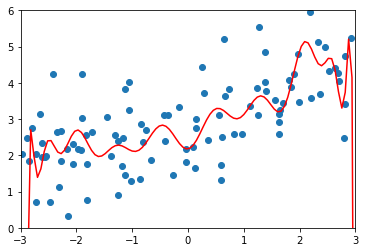

In [21]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

In [22]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

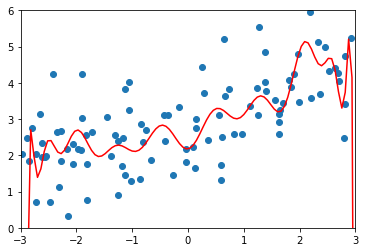

In [23]:
plot_model(poly_reg)

### 使用岭回归

In [25]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [30]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)
y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3233492754136291

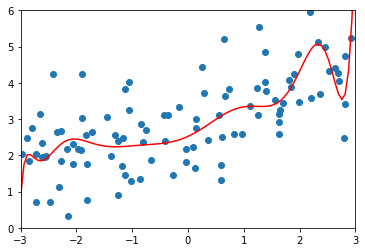

In [31]:
plot_model(ridge1_reg)

In [32]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, y_train)
y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1888759304218461

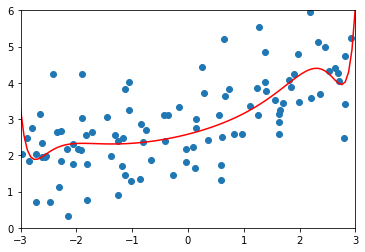

In [33]:
plot_model(ridge2_reg)

In [34]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)
y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.3196456113086197

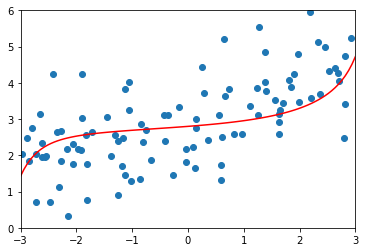

In [35]:
plot_model(ridge3_reg)

In [36]:
ridge4_reg = RidgeRegression(20, 100000000)
ridge4_reg.fit(X_train, y_train)
y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)

1.840889124848122

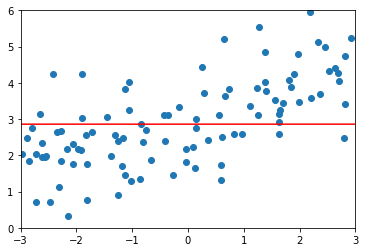

In [37]:
plot_model(ridge4_reg)

当a非常大时，本质上成了优化正则表达项，即让所有theta=0